
# Principal Component Analysis, Eigenvectors, & Eigenvalues: lecture

## 1. Introduction

Up until now, We have focused on supervised learning. This group of methods aims at predicting labels based on training data that is labeled as well. Principal Component Analysis is our first so-called "unsupervised" estimator. Generally, the aim of unsupervised estimators is to reveal interesting data patterns without having any reference labels.

The first unsupervised learning algorithm is Principal Component Analysis, also referred to as PCA. PCA is a dimensionality reduction technique which is often used in practice for visualization, feature extraction, noise filtering, etc.

Generally, PCA would be applied on data sets with many variables. PCA creates new variables that are linear combinations of the original variables. The idea is to reduce the dimension of the data considerably while maintaining as much information as possible. While the purpose is to significantly reduce the dimensionality, the maximum amount of new variables that can possibly be created is equal to the number of original variables. A nice feature of PCA is that the newly created variables are uncorrelated.

**A simple example** : Imagine that a data set consists of the height and weight of a group of people. One could imagine that these 2 metrics are heavily correlated, so we could basically summarize these 2 metrics in one variable, a linear combination of the two. This one variable will contain most of the information from 2 variables in one. It is important to note that the effectiveness of PCA strongly depends on the structure of the correlation matrix of the existing variables!

## 2. A Brief Aside: Eigenvalues and Eigenvectors

In order to understand how PCA actually works, we first need to be comfortable with **_Eigenvectors_** and **_Eigenvalues_**.

An eigenvector is a vector that after transformation hasn't changed, except by a scalar value known as the *eigenvalue*.

### 2.1 Definition

If there exists a square matrix $A$ (an n x n matrix) , then a scalar $\lambda$ is called the **eigenvalue** of $A$ if there is a non-zero vector $v$ such that

$$Av = \lambda v$$.

This vector $v$ is then called the **eigenvector** of A corresponding to $\lambda$.

Eigenvalues and eigenvectors are very useful and have tons of applications!


Imagine you have a matrix

\begin{equation}
A = \begin{bmatrix}
   3 & 2 \\
   3 & -2
\end{bmatrix}
\end{equation}

We have an eigenvector
\begin{equation}
v = \begin{bmatrix}
    2 \\
    1
\end{bmatrix}
\end{equation}

Let's perform the multiplication $A v$

\begin{equation}
Av  = \begin{bmatrix}
   3 & 2 \\
   3 & -2
\end{bmatrix}
\begin{bmatrix}
    2 \\
    1
\end{bmatrix} = \begin{bmatrix}
    3*2+2*1 \\
   3*2+(-2*1)
\end{bmatrix}
= \begin{bmatrix}
    8 \\
   4
\end{bmatrix}
\end{equation}


Now we want to see if we can find a $\lambda$ such that


\begin{equation}
Av = \begin{bmatrix}
   8 \\
   4
\end{bmatrix}= \lambda \begin{bmatrix}
   2 \\
   1
\end{bmatrix}
\end{equation}

Turns out $\lambda =4$ is the eigenvalue for our proposed eigenvector!


### 2.2 But how can you find values of eigenmatrices?

An $n xn$ matrix has n eigenvectors and n eigenvalues! How to find the eigenvalues?

$ det(A- \lambda I)= 0$

\begin{equation}
det(A- \lambda I) = det\begin{bmatrix}
   3-\lambda & 2 \\
   3 & -2-\lambda
\end{bmatrix}
\end{equation}

This way we indeed find that 4 is an eigenvalue, and so is -3! You'll learn about the connection between eigenvalues and eigenmatrices in a second.

https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/

https://www.youtube.com/watch?v=ue3yoeZvt8E


## 3.  PCA: some notation

### 3.1 The data matrix

Let's say we have P variables $X_1, X_2, \dots, X_p$ and $n$ observations $1,...,n$. Or data looks like this:

\begin{bmatrix}
    X_{11} & X_{12} & X_{13} & \dots  & X_{1p} \\
    X_{21} & X_{22} & X_{23} & \dots  & X_{2p} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    X_{n1} & X_{n2} & X_{n3} & \dots  & X_{np}
\end{bmatrix}

For 2 variables, this is what our data could look like:

In [5]:
import numpy as np
import matplotlib
# %matplotlib inline  
import numpy as np

np.random.seed(123)
X = np.random.normal(2, 1.5, 50)
Y = np.random.normal(3, 0.6, 50)
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.ylim(-5,5)
plt.xlim(-7,7)

plt.scatter(X, Y, s = 6)

ModuleNotFoundError: No module named 'matplotlib'

3.2 The mean & mean-corrected data
The mean of the $j$-th variable:

$\bar{X}j = \dfrac{\sum{i=1}^n X_{ij}}{n}= \bar X_{.j}$

To get to the mean-corrected data: substract the mean from each $X_{ij}$

$x_{ij} = X_{ij}-\bar X_{.j}$

Going back to our two variables example, this is how the data would be shifted:

In [4]:
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
X_mean = X- np.mean(X)
Y_mean = Y- np.mean(Y)
plt.ylim(-5,5)
plt.xlim(-7,7)
plt.scatter(X_mean, Y_mean, s = 6)

NameError: name 'plt' is not defined

3.3 The variance & standardized data
$s^2_j = \dfrac{\sum_{i=1}^n (X_{ij}-\bar X_{.j})^2}{n-1}= \dfrac{\sum_{i=1}^n x_{ij}^2}{n-1}$

To get to the standardized data: divide the mean-corrected data by the standard deviation $s_j$.

$z_{ij} = \dfrac{x_{ij}}{s_{j}}$

Going back to the example with 2 variables, this is what standardized data would look like:

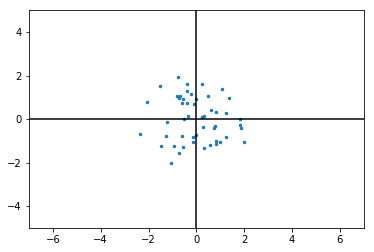

In [3]:
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
X_mean = X- np.mean(X)
Y_mean = Y- np.mean(Y)
X_std= np.std(X)
Y_std = np.std(Y)
X_stdized = X_mean / X_std
Y_stdized = Y_mean / Y_std
plt.ylim(-5,5)
plt.xlim(-7,7)
plt.scatter(X_stdized, Y_stdized, s=6)

3.4 The covariance
The covariance for two variables $X_j$ and $X_k$:

$s_{jk} = \dfrac{\sum_{i=1}^n (X_{ij}-\bar X_{.j})(X_{ij}-\bar X_{.k})}{n-1}= \dfrac{\sum_{i=1}^n x_{ij}x_{ik}}{n-1}$

Denote $\mathbf{S}$ the sample covariance matrix

\begin{equation} \mathbf{S} = \begin{bmatrix} s^2_{1} & s_{12} & \dots & s_{1p} \ s_{21} & s^2_{2} & \dots & s_{2p} \ \vdots & \vdots & \ddots & \vdots \ s_{p1} & s_{p2} & \dots & s^2_{p} \end{bmatrix} \end{equation}

When you do the same computation with standardized variables, you get the correlation. Remember that the correlation $r_{jk}$ always lies between -1 and 1.

$r_{jk} = \dfrac{\sum_{i=1}^n z_{ij}z_{ik}}{n-1}$

Then, $\mathbf{R}$ is the correlation matrix

\begin{equation} \mathbf{R} = \begin{bmatrix} 1 & r_{12} & \dots & r_{1p} \ r_{21} & 1 & \dots & r_{2p} \ \vdots & \vdots & \ddots & \vdots \ r_{p1} & r_{p2} & \dots & 1 \end{bmatrix} \end{equation}

4. How does PCA work? Matrices and eigendecomposition
4.1 Finding principal components
$ \mathbf{X}= (X_1, X_2, \ldots, X_p)$ is a random variable. Then the principal components of $\mathbf{X}$, denoted by $PC_1, \ldots, PC_p$ satisfy these 3 conditions:

$(PC_1, PC_2, \ldots, PC_p)$ are mutually uncorrelated
$var(PC_1)\geq var(PC_2) \geq \ldots \geq var(PC_p)$
$PC_j = c_{j1} X_1+c_{j2} X_2+\ldots+c_{jp} X_p$
Note that for $j=1,\ldots,p$ and $c_j = (c_{j1}, c_{j2}, \ldots, c_{jp})$' is a vector of constants satisfying $ \lVert{\mathbf{c_j} \rVert^2 = \mathbf{c'j}\mathbf{c_j}} = \displaystyle\sum^p{k=1} c^2_{kj}=1 $

The variance of $PC$ is then: $var(PC_j) = var( c_{j1} X_1+c_{j2} X_2+\ldots+c_{jp} X_p) \ = c_{j1}^2 var(X_1) +c_{j2}^2 var(X_2) + \ldots + c_{jp}^2 var(X_p) + 2 \displaystyle\sum_k\sum_{l \neq k}c_{jk}c_{jl} cov(X_k, X_l) \ = c_j' \Sigma c_j$

In words, this means that variances can easily be computed using the coefficients used while making the linear combinations.

We can prove that $var(PC_1)\geq var(PC_2) \geq \ldots \geq var(PC_p)$ is actually given by the eigenvalues $\lambda_1\geq \lambda_2 \geq \ldots \geq \lambda_3$ and the eigenvectors are given by $c_j = (c_{j1}, c_{j2}, \ldots, c_{jp})$. From here on, we'll denote the eigenvectors by $e_j$ instead of $c_j$.

Sources
http://www.bbk.ac.uk/ems/faculty/brooms/teaching/SMDA/SMDA-02.pdf

https://stackoverflow.com/questions/13224362/principal-component-analysis-pca-in-python

https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/